# Employee Turnover Prediction

### Build models (Logistic Regression, SVM, KNN, Random Forest) to predict the target variable "left" (modeling if an employee has left the company or not)

The data was downloaded from Kaggle. Each row represents an employee, each column contains employee attributes:
- Satisfaction_level (0–1)
- Last_evaluation (Time since last evaluation in years)
- Number_projects (Number of projects completed while at work)
- Average_monthly_hours (Average monthly hours at workplace)
- Time_spend_company (Time spent at the company in years)
- Work_accident (Whether the employee had a workplace accident)
- Left (Whether the employee left the workplace or not (1 or 0))
- Promotion_last_5years (Whether the employee was promoted in the last five years)
- Sales (Department in which they work for)
- Salary (Relative level of salary)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hr_data.csv to hr_data.csv


In [9]:
df = pd.read_csv('hr_data.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [ ]:
df.shape

(14999, 11)

In [ ]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,float64
time_spend_company,float64
work_accident,int64
left,object
promotion_last_5years,int64
is_smoker,object
department,object


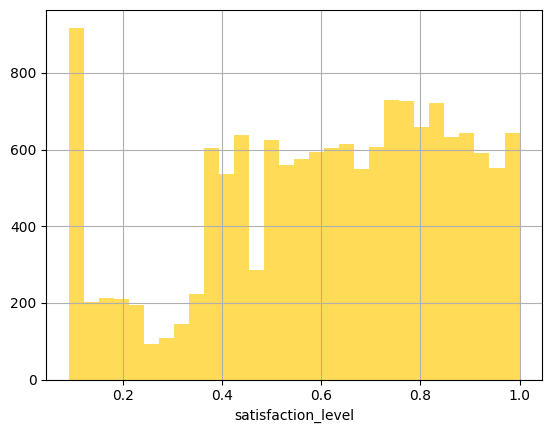

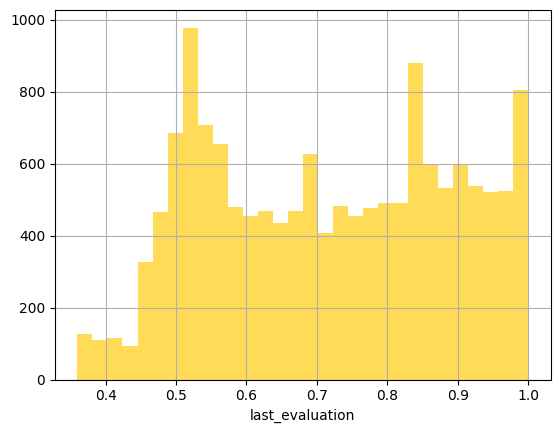

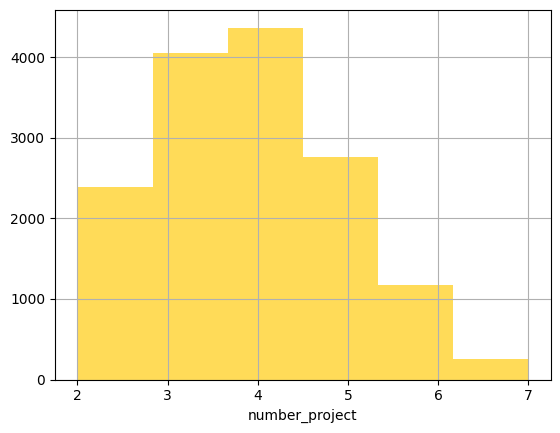

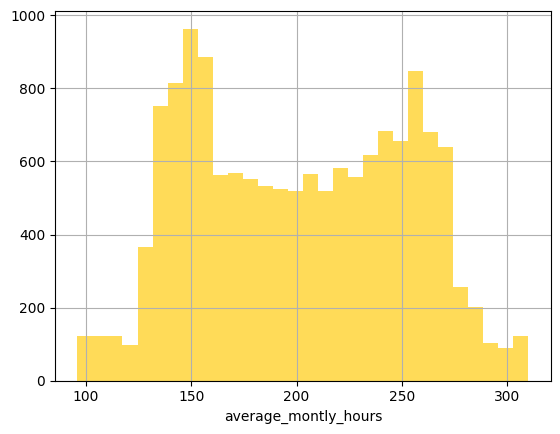

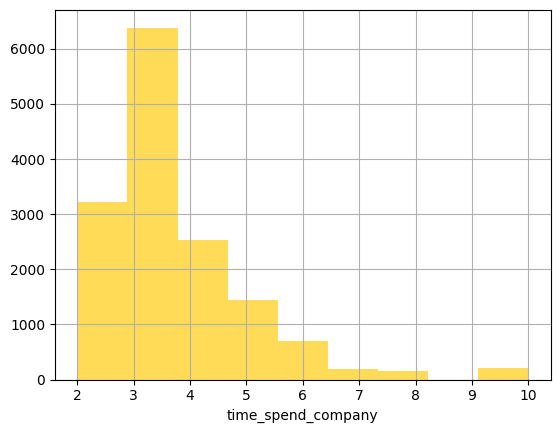

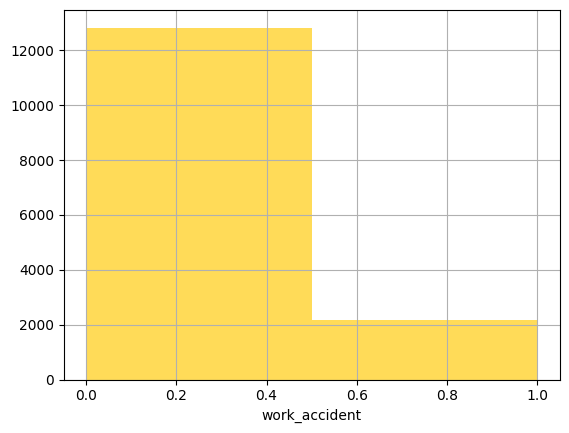

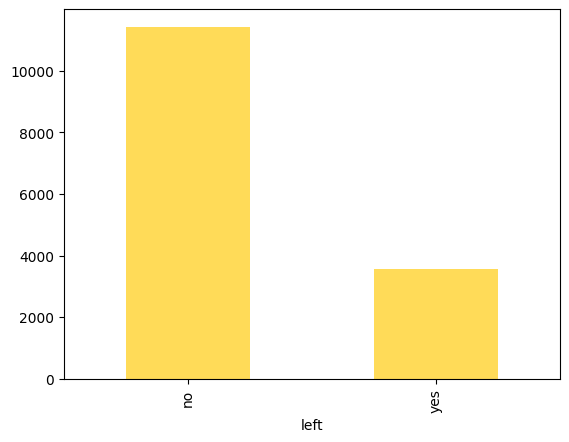

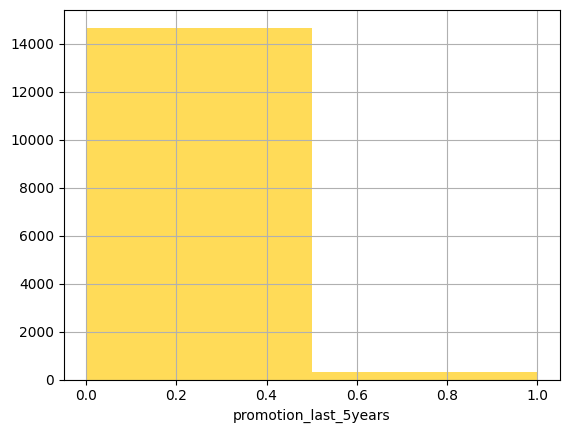

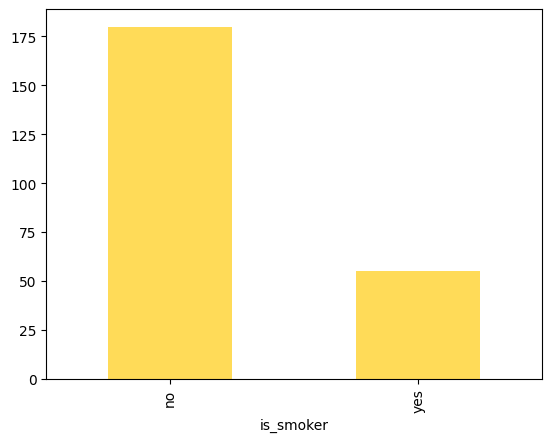

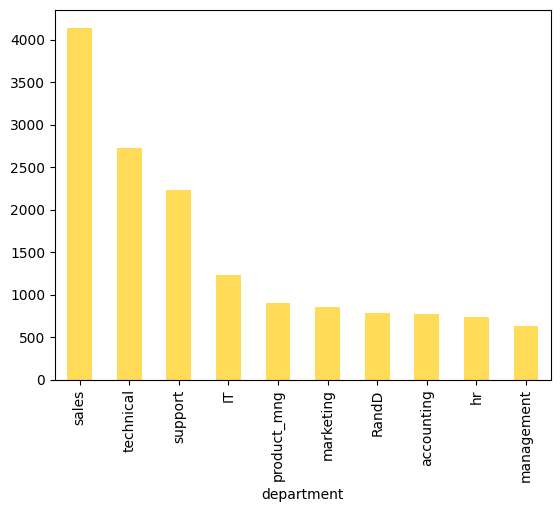

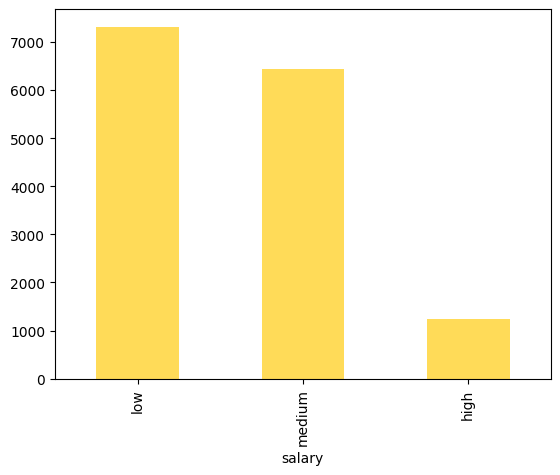

In [ ]:
# Print the distibutions
for col in df.columns:
    fig = plt.figure()
    s = df[col]
    if s.dtype in ('float', 'int'):
        num_bins = min((30, len(df[col].unique())))
        s.hist(bins=num_bins,color='#FFDB58')
    else:
        s.value_counts().plot.bar(color='#FFDB58')
    plt.xlabel(col)

Checking missing values

In [10]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,368
time_spend_company,151
work_accident,0
left,0
promotion_last_5years,0
is_smoker,14764
department,0


In [11]:
# Percentage of missing values
df.isnull().sum() / len(df) * 100

,0
satisfaction_level,0.000000
last_evaluation,0.000000
number_project,0.000000
average_montly_hours,2.453497
time_spend_company,1.006734
work_accident,0.000000
left,0.000000
promotion_last_5years,0.000000
is_smoker,98.433229
department,0.000000


is_smoker has 98.43% missing values do we can delete this variable

In [12]:
# Delete is_smoker variable
del df['is_smoker']

In [13]:
# Replace median values for time_spend_company
median_tsc = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(median_tsc)

In [14]:
# Replace mean values for average_montly_hours
mean_amh = df.average_montly_hours.mean()
df.average_montly_hours = df.average_montly_hours.fillna(mean_amh)

In [15]:
#check missing values again
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [ ]:
df.left.value_counts()

,count
left,
no,11428
yes,3571


In [16]:
# Convert categorical variable to binary integer representation
df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']]  # Features
y=df['left']  # Labels

# Split dataset into training set and test set 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [19]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_std, y_train)

y_pred=rfc.predict(X_test_std)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9862222222222222


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test, y_pred)

array([[3451,   11],
       [  51,  987]])

In [ ]:
# What is the accuracy by class?

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 99.68%
left = 1 : 95.09%


We can see satisfaction level is the most important feature.

#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred1 = logreg.predict(X_test_std)
acc1 = accuracy_score(y_test, y_pred1)
print('accuracy = {:.1f}%'.format(acc1*100))

accuracy = 79.4%


In [ ]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[3202,  260],
       [ 669,  369]])

In [ ]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat1 = confusion_matrix(y_test, y_pred1)
scores1 = cmat1.diagonal() / cmat1.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores1[0]))
print('left = 1 : {:.2f}%'.format(scores1[1]))

Percent accuracy score per class:
left = 0 : 92.49%
left = 1 : 35.55%


#### Support Vector Machine

In [ ]:
# Train a support vector machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [ ]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred2 = svm.predict(X_test_std)
acc2 = accuracy_score(y_test, y_pred2)
print('accuracy = {:.1f}%'.format(acc2*100))

accuracy = 78.3%


In [ ]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[3253,  209],
       [ 768,  270]])

In [ ]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat2 = confusion_matrix(y_test, y_pred2)
scores2 = cmat2.diagonal() / cmat2.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores2[0]))
print('left = 1 : {:.2f}%'.format(scores2[1]))

Percent accuracy score per class:
left = 0 : 93.96%
left = 1 : 26.01%


#### K-Nearest Neighbors

In [ ]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred3 = knn.predict(X_test_std)
acc1 = accuracy_score(y_test, y_pred3)
print('accuracy = {:.1f}%'.format(acc1*100))

accuracy = 94.2%


In [ ]:
confusion_matrix(y_test, y_pred3)

array([[3289,  173],
       [  86,  952]])

In [ ]:
# What is the accuracy by class?

print('Percent accuracy score per class:')
cmat3 = confusion_matrix(y_test, y_pred3)
scores3 = cmat3.diagonal() / cmat3.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores3[0]))
print('left = 1 : {:.2f}%'.format(scores3[1]))

Percent accuracy score per class:
left = 0 : 95.00%
left = 1 : 91.71%


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_std, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'n_estimators': 300}


In [ ]:
#Refit the Random Forest model using these best parameters.
from sklearn.ensemble import RandomForestClassifier

best_rfc = RandomForestClassifier(max_depth=None, n_estimators=300)
best_rfc.fit(X_train_std, y_train)


RandomForestClassifier(n_estimators=300)

In [ ]:
#Model evaluation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(), X_train_std, y_train, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated scores: [0.98380952 0.99142857 0.9847619  0.98666667 0.98284898]
Mean accuracy: 0.9859031284738764


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
#Evaluate the Model
y_pred = best_rfc.predict(X_test_std)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Percent accuracy score per class
scores = cm.diagonal() / cm.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))


Confusion Matrix:
[[3450   12]
 [  51  987]]
Accuracy: 0.986
left = 0 : 99.65%
left = 1 : 95.09%


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
y_proba = best_rfc.predict_proba(X_test_std)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_test, y_proba))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.95      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

ROC-AUC score: 0.992025586911683


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rfc, X_train_std, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", cv_scores)
print("Mean cross-validated accuracy:", cv_scores.mean())


Cross-validated accuracy scores: [0.98238095 0.99190476 0.98571429 0.98666667 0.98380181]
Mean cross-validated accuracy: 0.986093695410513


In [21]:
columns = X.columns

In [22]:
feature_imp = pd.Series(rfc.feature_importances_,index=columns).sort_values(ascending=False)
feature_imp

,0
satisfaction_level,0.300357
time_spend_company,0.182477
number_project,0.178580
average_montly_hours,0.160307
last_evaluation,0.126306
work_accident,0.010916
salary_low,0.007377
salary_high,0.005744
salary_medium,0.003653
department_technical,0.003597


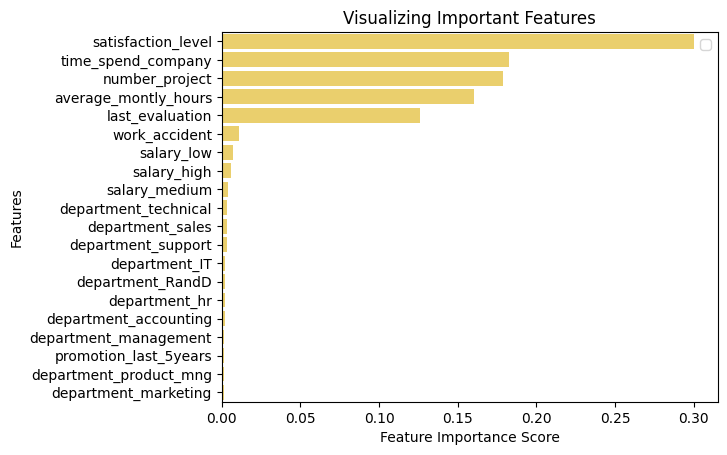

In [23]:
# Feature important
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='#FFDB58')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# We can see satisfaction level is the most important feature.

In [25]:
#Implement Recursive Feature Elimination (RFE)
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [26]:
X = df.drop(columns=['left'])  # Drop the target variable
y = df['left']  # Define the target variable

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
#Apply RFE with Random Forest
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE model
rfe_rf = RFE(estimator=rf_model, n_features_to_select=5)  # Select top 5 features

# Fit the model
rfe_rf.fit(X_train, y_train)

# Print the selected features
print("Selected Features by RFE with Random Forest:")
print(X.columns[rfe_rf.support_])


Selected Features by RFE with Random Forest:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')


In [31]:
# Predict using Random Forest RFE model
y_pred_rf = rfe_rf.predict(X_test)

# Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest RFE Model Accuracy: {accuracy_rf:.2f}')



Random Forest RFE Model Accuracy: 0.99
